# Pt. 1
Upload the file Online-Retail-France.xlsx. It is a MS Excel file, you can read it with the Pandas function read_excel, show the size and a small portion of its content

In [77]:
import pandas as pd
df = pd.read_excel('./Online-Retail-France.xlsx')
print(df.shape)
display(df.head())
df.info()

(8557, 7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8557 non-null   object 
 1   StockCode    8557 non-null   object 
 2   Description  8557 non-null   object 
 3   Quantity     8557 non-null   int64  
 4   InvoiceDate  8557 non-null   object 
 5   UnitPrice    8557 non-null   float64
 6   CustomerID   8491 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 468.1+ KB


# 2
It is a transactional database where the role of transaction identifier is played by the column InvoiceNo and the items are in the column Description. Print the number of unique Description values.

In [78]:
df['Description'].unique().size

1565

# 3
Some descriptions represent the same item but have different leading or trailing spaces, therefore they must be made uniform with the Pandas function str.strip() Print the number of unique Description values after this cleaning.

In [79]:
df['Description'] = df['Description'].str.strip()
df['Description'].unique().size

1564

# 4 
Some rows may not have an InvoiceNo and must be removed, because they cannot be used. Check if there are such that rows and in case remove them. Inspect the effect of this cleaning.

In [80]:
df['InvoiceNo'] = df['InvoiceNo'].dropna()
df['Description'].unique().size

1564

# 5
Some InvoiceNo start with a C. They are "credit transactions" and must be removed. Inspect the effect of this cleaning.

In [81]:
n = df.shape[0]
df = df[~df['InvoiceNo'].str.startswith('C')]
print(f"We delete {n - df.shape[0]} rows whose InvoiceNo starts with C")

We delete 149 rows whose InvoiceNo starts with C


# 6
Several transactions include the item POSTAGE, which represents the mailing expenses. In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed. Inspect the effect of this cleaning.

In [82]:
n = df.shape[0]
# df = df[df['Description']!='POSTAGE']
df = df[~df['Description'].str.contains('POSTAGE')]
print(f'We deleted {n - df.shape[0]} rows with POSTAGE as an item')

We deleted 300 rows with POSTAGE as an item


# 7
After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded. To do so, group by InvoiceNo and Description computing a sum on Quantity, use the Pandas unstack function to move the items from rows to columns, reset the index, fill the missing with zero, store the result in a new dataframe basket and inspect it.

In [121]:
basket = (df
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum()
          # Then we switch the [level+1] column as the first row (lavel)
          .unstack(level=1) 
          .reset_index()
          .fillna(0)
          .set_index('InvoiceNo')) # So it is not a column anymore 
display(basket.head())
display(basket.describe())

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.868217,0.310078,0.005168,0.062016,0.509044,0.385013,0.400517,0.062016,0.281654,0.186047,...,0.193798,0.023256,0.010336,0.002584,0.082687,0.279070,0.012920,0.186047,0.031008,0.062016
std,5.109242,2.474110,0.101666,0.861544,5.445138,2.978173,3.454711,1.219989,2.006660,1.484466,...,2.195417,0.340644,0.203331,0.050833,1.626651,2.348994,0.254164,1.922464,0.609994,0.861544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,20.000000,2.000000,12.000000,96.000000,24.000000,48.000000,24.000000,24.000000,12.000000,...,25.000000,6.000000,4.000000,1.000000,32.000000,36.000000,5.000000,24.000000,12.000000,12.000000


# 8
There are a lot of zeros in the data but we also need to convert to True the positive values and to False the non–positive values. Inspect the result of this transformation and verify the correctness.

In [128]:
basket = basket > 0 # False if <= 0 and True if >= 1
basket.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,375,381,386,385,381,380,380,386,378,381,...,384,385,386,386,386,380,386,383,386,385


# 9 and 10
### 9
Find the maximum value of min_support such that the number of rules generated from the frequent itemsets with lift not less than 1 is at least 20. Show the value obtained for min_support and show the rules.
- Hint: use a loop with an initial value min_support=1 and decrease it in steps -0.01
- Hint: In apriori set the parameter use_colnames=True.

### 10
Generate the rules with association_rules using metric=lift and min_threshold=1.

In [153]:
from mlxtend.frequent_patterns import apriori, association_rules

# Parameters
step = 0.01
min_support = 1
min_rules = 20
metric = 'lift'
min_threshold = 1

# ( part 9 )
# I am trying to find the biggest support ratio that provides enough rules
while True:
    # I extract the frequent itemsets, so if the itemset appears with a frequency over 'min_support'
    frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
    if frequent_itemsets.shape[0]>0:
        # I am finding some itemsets, so i extract the rules between them
        rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    if frequent_itemsets.shape[0] >0 and rules.shape[0]>=min_rules:
        # ( Part 10 )
        # I found enough rules
        break
    else:
        # I try with a lower support ratio
        min_support -= step


# 11
In order to scatter–plot some information about the rules, it is better to sort them according to some metrics. We will sort on descending lift and confidence, then do a scatter plot of them.

In [170]:
rules.sort_values(by=['lift', 'confidence'], ascending=False)['lift']

0     8.532717
1     8.532717
15    7.546500
18    7.546500
14    6.987500
19    6.987500
12    6.880000
13    6.880000
16    6.046875
17    6.046875
11    5.953846
10    5.953846
8     5.512821
9     5.512821
6     4.385572
7     4.385572
2     3.800505
3     3.800505
4     3.500678
5     3.500678
Name: lift, dtype: float64

<Axes: title={'center': 'Association Rules (proportioned to lift)'}, xlabel='support', ylabel='confidence'>

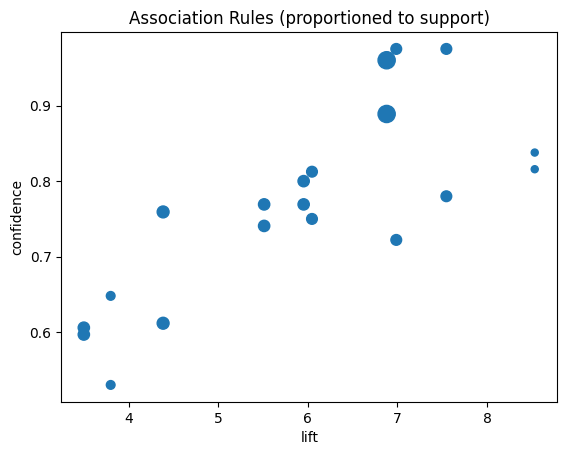

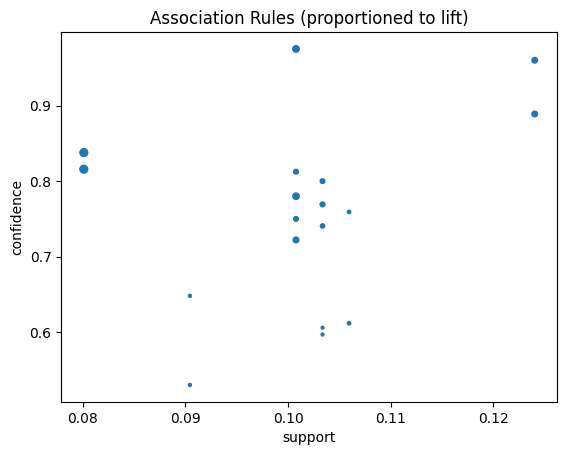

In [185]:
# Scatters with dots proportioned
rules.sort_values(by=['lift', 'confidence'], ascending=False).plot.scatter(
    x='lift', 
    y='confidence',
    title='Association Rules (proportioned to support)',

    # DOT DIMENSION: The are between 10^(-2) and 10^(-1) 
    #                   -> *10^2 to work with unities
    #                   -> 1.5**() to highlight the differences in a not linear way
    s=1.5**(rules.sort_values(by=['lift', 'confidence'], ascending=False)['support']*100)
)

rules.sort_values(by=['lift', 'confidence'], ascending=False).plot.scatter(
    x='support', 
    y='confidence', 
    title='Association Rules (proportioned to lift)',

    # DOT DIMENSION: The are between 10^1
    #                   -> I'm already working on unities
    #                   -> 10**() to highlight the differences in a not linear way
    s=1.5**(rules.sort_values(by=['lift', 'confidence'], ascending=False)['lift'])
)